# importar recursos

In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg


# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "c:\Users\USER\anaconda3\Lib\site-packages\spacy\compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\__init__.py", line 5, in <module>
    from .config import registry
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\config.py", line 5, in <module>
    from .types import Decorator
  File "c:\Users\USER\anaconda3\Lib\site-packages\thinc\types.py", line 25, in <module>
    from .compat import cupy, has_cupy
  File "c:\Users\USER\anaconda3\Lib\s

# Bases de datos periodico portafolio

In [18]:
# Lista de URLs de la base de datos portafolio
BASE_DATOS_portafolio= [
"https://www.portafolio.co/opinion/otros-columnistas-1/la-seguridad-es-paz-la-politica-de-seguridad-578114",
"https://www.portafolio.co/opinion/mauricio-reina/vivan-la-libertad-y-la-paz-592093",
"https://www.portafolio.co/opinion/otros-columnistas-1/construyendo-el-camino-hacia-la-paz-rosmery-quintero-castro-576398",
"https://www.portafolio.co/opinion/maria-sol-navia-v/hablemos-de-paz-columnista-580039",
"https://www.portafolio.co/opinion/analisis/enemigo-interno-de-la-paz-total-opinion-589574",
"https://www.portafolio.co/opinion/analisis/paz-aqui-alla-y-mas-alla-opinion-590773",
"https://www.portafolio.co/opinion/analisis/ante-la-desesperanza-inclusion-se-trata-de-construir-paz-desde-la-empresa-opinion-594655",
"https://www.portafolio.co/opinion/editorial/doble-tenaza-editorial-portafolio-591918",
"https://www.portafolio.co/opinion/analisis/para-ninguna-parte-opinion-589571",
"https://www.portafolio.co/opinion/ricardo-santamaria/concesiones-para-la-paz-de-petro-584612",
"https://www.portafolio.co/opinion/editorial/politica-en-crisis-editorial-portafolio-583307",
"https://www.portafolio.co/paz-y-comunicaciones-opinion-583183",
"https://www.portafolio.co/opinion/salomon-kassin-tesone-1/venezuela-y-la-paz-total-puede-ayudar-con-el-eln-581325",
"https://www.portafolio.co/opinion/mauricio-reina/otra-semana-fatal-para-el-gobierno-580698",
"https://www.portafolio.co/el-que-mucho-abarca-poco-aprieta-opinion-579794"
]
# Crear una lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "Portafolio"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_portafolio:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="article-content")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor_div = soup.find("div", class_="signature openSansBold2")
    autor = autor_div.text.strip() if autor_div else "Autor no encontrado"

    # Extraer fecha de publicación
    fecha_div = soup.find("meta", attrs={"name": "cXenseParse:recs:publishtime"})
    fecha = fecha_div["content"] if fecha_div else "Fecha no encontrada"


    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidosportafolio_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                          Autor      Fecha de Publicación  Número de Palabras  \
0             Otros Columnistas  2023-02-08T04:24:00.000Z                 480   
1                Mauricio Reina  2023-11-10T04:16:46.000Z                 473   
2             Otros Columnistas  2023-01-02T17:12:21.000Z                 485   
3            María Sol Navia V.  2023-03-17T00:33:23.000Z                 466   
4          Gustavo H. Cote Peña  2023-09-25T05:29:12.000Z                 449   
5       Carlos Enrique Cavelier  2023-10-18T07:29:56.000Z                 533   
6                Jorge Restrepo  2023-12-21T07:24:16.000Z                 454   
7   Francisco Miranda Hamburger  2023-11-08T01:13:12.000Z                 599   
8         Ricardo Villaveces P.  2023-09-25T05:37:59.000Z                 461   
9            Ricardo Santamaría  2023-06-20T03:28:48.000Z                 486   
10  Francisco Miranda Hamburger  2023-05-25T01:05:56.000Z                 564   
11           Ricardo Santama

# Analisis descriptivo

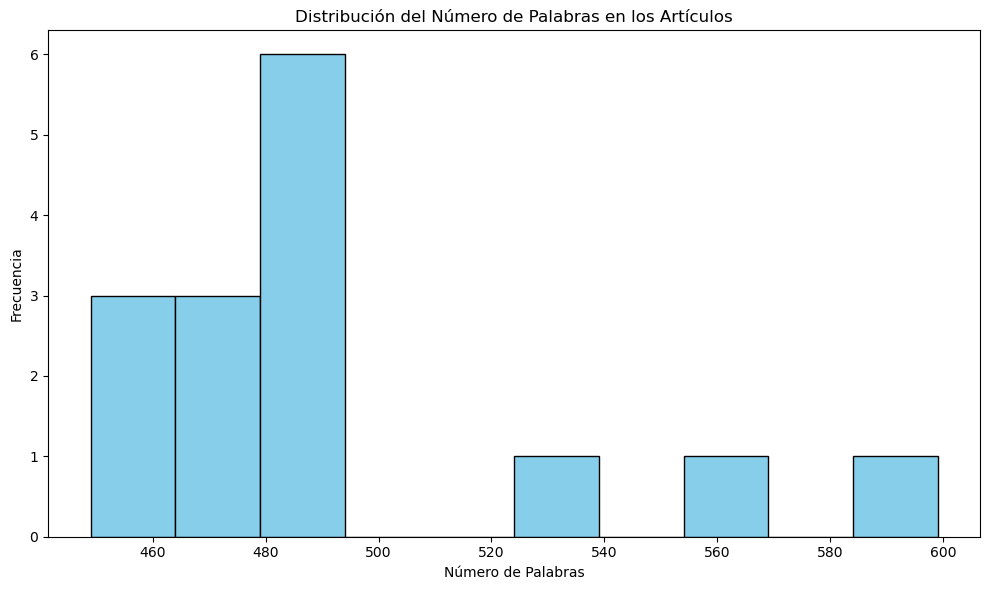

In [10]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

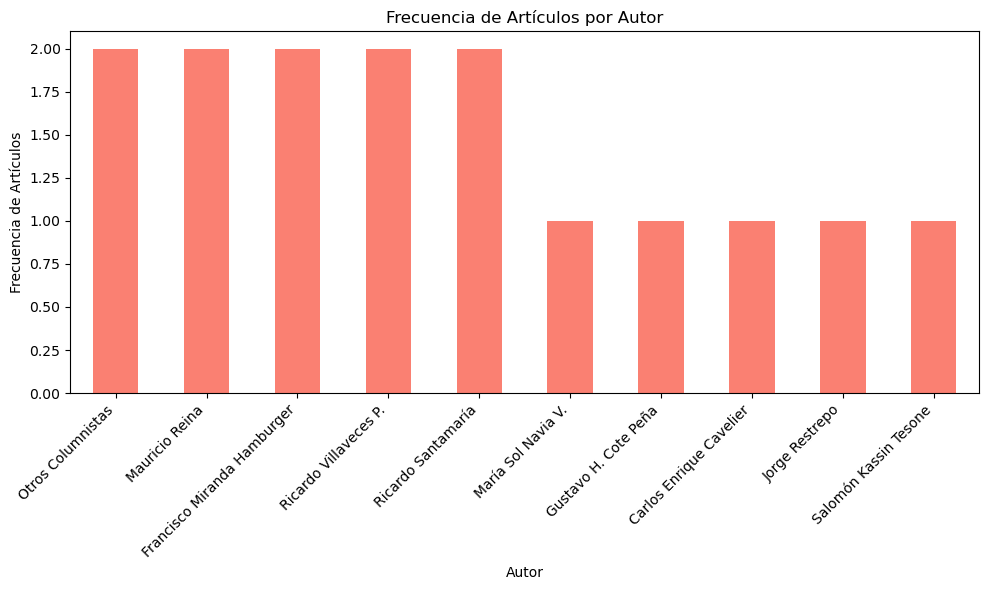

In [11]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Convertir la columna de fechas a datetime
df['Fecha de Publicación']  = pd.to_datetime(df['Fecha de Publicación'] , format='%Y-%m-%dT%H:%M:%S.%fZ')

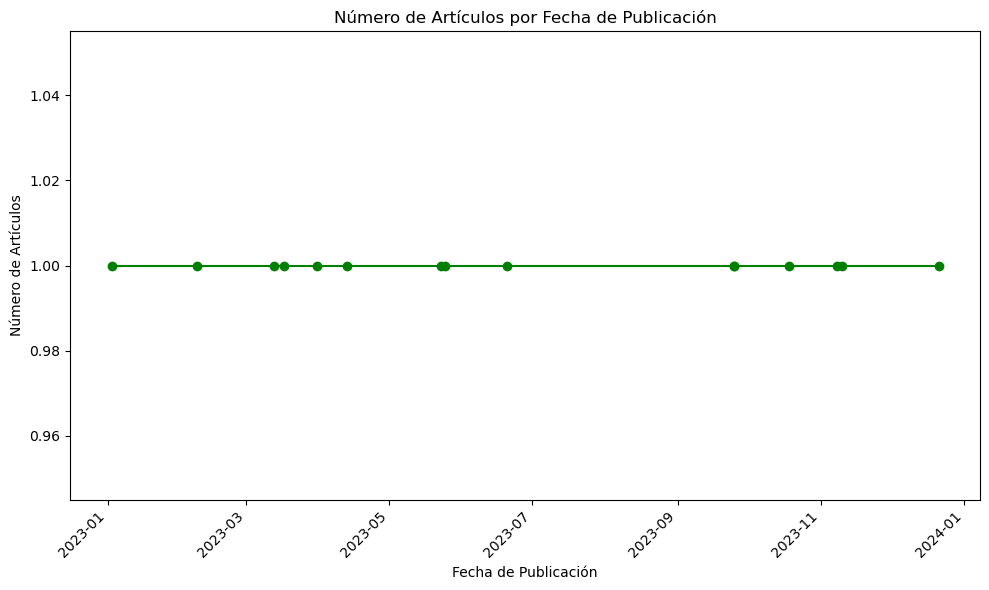

In [17]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidosportafolio_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)